In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [76]:
FILE_PATH_1 = 'robot1_with_hard_detection_trial_1.csv'
FILE_PATH_2 = 'robot2_with_hard_detection_trial_1.csv'

In [77]:
N_COLUMNS = 36 # should infer from df number of columns

ROBOT_INFO_SIZE = 3
DETECTION_INFO_SIZE = 1
CLUSTER_INFO_SIZE = 4

N_CLUSTERS = int((N_COLUMNS - ROBOT_INFO_SIZE - DETECTION_INFO_SIZE) / CLUSTER_INFO_SIZE)

In [78]:
def load_robot_data(file_path):
    df = pd.read_csv(file_path, header=None)
    column_names = ['robot_x', 'robot_y', 'robot_angle']
    for i in range(N_CLUSTERS):
        column_names.extend([f'cluster{i}_x', f'cluster{i}_y', f'cluster{i}_angle', f'cluster{i}_w'])
    column_names.append('has_detection')
    df.columns = column_names
    return df
    
df_robot1 = load_robot_data(FILE_PATH_1)
df_robot2 = load_robot_data(FILE_PATH_2)

In [79]:
def compute_clusters_errors(df):
    for cluster_id in range(8):
        diff_x_square = (df[f"robot_x"]- df[f"cluster{cluster_id}_x"])**2
        diff_y_square = (df[f"robot_y"]- df[f"cluster{cluster_id}_y"])**2
        df[f"cluster{cluster_id}_error"] = np.sqrt(diff_x_square+diff_y_square)
    return df


df_robot1 = compute_clusters_errors(df_robot1)
df_robot2 = compute_clusters_errors(df_robot2)

In [ ]:
EXPERIMENT_TIME_S = 310
CELLS_TO_METERS = 10

def _cell_to_meters(cells):
    return cells / CELLS_TO_METERS

t1 = np.linspace(1, EXPERIMENT_TIME_S, len(df_robot1.cluster1_w))
t2 = np.linspace(1, EXPERIMENT_TIME_S, len(df_robot2.cluster1_w))

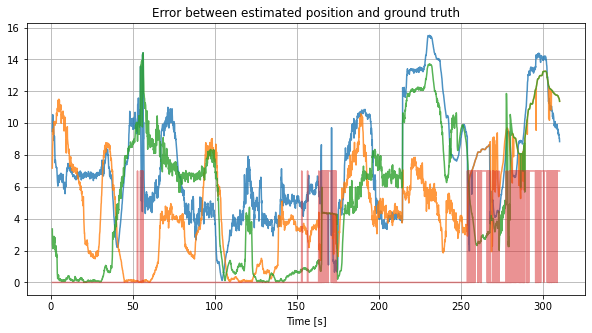

In [98]:
plt.figure(figsize=(10, 5))
plt.title('Error between estimated position and ground truth')

s = 0
for cluster_id in range(8):
    df_robot1[f"cluster{cluster_id}_w"] = df_robot1[f"cluster{cluster_id}_w"].mean()
    s += df_robot1[f"cluster{cluster_id}_w"]

weights = []
for cluster_id in range(8):
    df_robot1[f"cluster{cluster_id}_w"] /= s
    weights.append(df_robot1[f"cluster{cluster_id}_w"].iloc[0])

weights_to_plot = sorted(weights, reverse=True)[:3]
for cluster_id in range(8):
    weight = df_robot1[f"cluster{cluster_id}_w"].iloc[0]
    if weight in weights_to_plot: 
        plt.plot(t1, _cell_to_meters(df_robot1[f"cluster{cluster_id}_error"]), alpha=0.8)
plt.plot(t1, df_robot1.has_detection * 7, alpha=0.5)
plt.xlabel('Time [s]')
# plt.legend(['robot_1', 'robot2', 'has_detection'])
plt.grid()
plt.show()

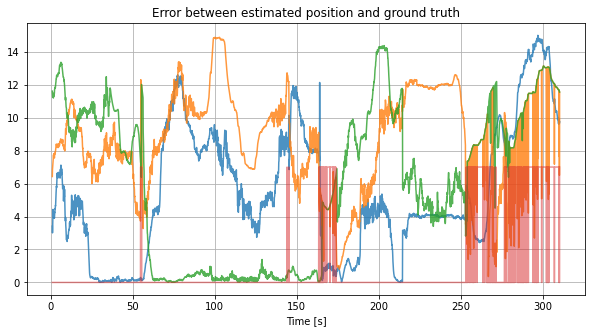

In [100]:
plt.figure(figsize=(10, 5))
plt.title('Error between estimated position and ground truth')

s = 0
for cluster_id in range(8):
    df_robot2[f"cluster{cluster_id}_w"] = df_robot2[f"cluster{cluster_id}_w"].mean()
    s += df_robot2[f"cluster{cluster_id}_w"]

weights = []
for cluster_id in range(8):
    df_robot2[f"cluster{cluster_id}_w"] /= s
    weights.append(df_robot2[f"cluster{cluster_id}_w"].iloc[0])

weights_to_plot = sorted(weights, reverse=True)[:3]
for cluster_id in range(8):
    weight = df_robot2[f"cluster{cluster_id}_w"].iloc[0]
    if weight in weights_to_plot: 
        plt.plot(t1, _cell_to_meters(df_robot2[f"cluster{cluster_id}_error"]), alpha=0.8)
plt.plot(t1, df_robot2.has_detection * 7, alpha=0.5)
plt.xlabel('Time [s]')
# plt.legend(['robot_1', 'robot2', 'has_detection'])
plt.grid()
plt.show()

Done!